In [1]:
from cortexlib.utils.plotting import simclr_colours, vgg19_colours, gabor_filter_colours
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../analysis/mouse_m01_d2/results/simclr_neural_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/simclr_neural_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/simclr_neural_m03_d4.json"),
    Path("../../analysis/mouse_m01_d2/results/vgg19_neural_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/vgg19_neural_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/vgg19_neural_m03_d4.json"),
    Path("../../analysis/mouse_m01_d2/results/gabor_neural_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/gabor_neural_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/gabor_neural_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 264 rows from 9 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,vgg19_neural,m01_d2,conv2_2,NaN,0.021,0.129,1.396,1.423,0.114,NaN
1,vgg19_neural,m01_d2,conv2_2,10.0,0.018,0.110,1.396,1.423,0.184,-0.099
2,vgg19_neural,m01_d2,conv2_2,20.0,0.019,0.111,1.396,1.423,0.180,-0.094
3,vgg19_neural,m01_d2,conv2_2,50.0,0.021,0.129,1.396,1.423,0.177,-0.087
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,1.396,1.423,0.177,-0.091
...,...,...,...,...,...,...,...,...,...,...
95,vgg19_neural,m02_d3,conv3_4,20.0,0.015,0.104,1.524,1.542,0.119,-0.063
96,vgg19_neural,m02_d3,conv3_4,50.0,0.015,0.105,1.524,1.542,0.120,-0.062
97,vgg19_neural,m02_d3,conv3_4,100.0,0.015,0.105,1.524,1.542,0.120,-0.056
98,vgg19_neural,m02_d3,conv4_4,NaN,0.015,0.132,1.627,1.664,0.024,NaN


In [2]:
# Filter to only rows where: for SimCLR and VGG19, 100 pcs; for Gabor, 10 pcs
df_pcs = df[
    ((df["model_target"].isin(["simclr_neural", "vgg19_neural"])) & (df["n_pcs"] == 100)) |
    ((df["model_target"] == "gabor_neural") & (df["n_pcs"] == 10))
]
df_pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,1.396,1.423,0.177,-0.091
9,vgg19_neural,m01_d2,conv3_4,100.0,0.018,0.109,1.515,1.462,0.199,-0.056
14,vgg19_neural,m01_d2,conv4_4,100.0,0.019,0.128,1.616,1.645,0.160,0.000
19,vgg19_neural,m01_d2,conv5_4,100.0,0.012,0.099,1.867,1.698,0.122,0.252
24,simclr_neural,m01_d2,fc,100.0,0.024,0.160,1.702,1.711,0.214,0.108
33,vgg19_neural,m01_d2,fc2,100.0,0.010,0.095,1.583,1.589,0.093,0.447
38,gabor_neural,m01_d2,gabor_large,10.0,-0.006,0.024,NaN,NaN,NaN,NaN
44,gabor_neural,m01_d2,gabor_medium,10.0,-0.006,0.024,NaN,NaN,NaN,NaN
50,gabor_neural,m01_d2,gabor_small,10.0,-0.006,0.024,NaN,NaN,NaN,NaN
56,simclr_neural,m01_d2,layer1,100.0,0.022,0.114,3.891,4.271,0.225,-0.114


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_pcs.groupby(["model_target", "layer"]).mean(numeric_only=True).reset_index()
avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,gabor_neural,gabor_large,10.0,-0.004667,0.026667,NaN,NaN,NaN,NaN
1,gabor_neural,gabor_medium,10.0,-0.004667,0.026667,NaN,NaN,NaN,NaN
2,gabor_neural,gabor_small,10.0,-0.004667,0.027000,NaN,NaN,NaN,NaN
3,simclr_neural,fc,100.0,0.019000,0.121000,1.703000,1.712333,0.174333,0.108
4,simclr_neural,layer1,100.0,0.020333,0.109333,3.820000,4.203000,0.195000,-0.114
5,simclr_neural,layer2,100.0,0.039000,0.178333,3.463333,3.928667,0.209333,-0.080
6,simclr_neural,layer3,100.0,0.041000,0.168333,1.891333,1.896333,0.213333,-0.005
7,simclr_neural,layer4,100.0,0.026000,0.128000,1.882333,1.889333,0.165333,0.085
8,vgg19_neural,conv2_2,100.0,0.016667,0.109333,1.395667,1.421333,0.137000,-0.091
9,vgg19_neural,conv3_4,100.0,0.015000,0.099000,1.517667,1.513000,0.146333,-0.056


In [4]:
# Get model name
avg_metrics["model"] = avg_metrics["model_target"].str.extract(r"(simclr|vgg19|gabor)")

# Remove Gabor prefix from label
avg_metrics["layer"] = avg_metrics["layer"].str.replace(r"^gabor_", "", regex=True)

# Compute SEM and merge
sem_df = df_pcs.groupby('layer')['mean_fev'].sem().reset_index()
sem_df.columns = ['layer', 'sem_fev']
avg_metrics = avg_metrics.merge(sem_df, on='layer', how='left')

avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,model,sem_fev
0,gabor_neural,large,10.0,-0.004667,0.026667,NaN,NaN,NaN,NaN,gabor,NaN
1,gabor_neural,medium,10.0,-0.004667,0.026667,NaN,NaN,NaN,NaN,gabor,NaN
2,gabor_neural,small,10.0,-0.004667,0.027000,NaN,NaN,NaN,NaN,gabor,NaN
3,simclr_neural,fc,100.0,0.019000,0.121000,1.703000,1.712333,0.174333,0.108,simclr,0.020599
4,simclr_neural,layer1,100.0,0.020333,0.109333,3.820000,4.203000,0.195000,-0.114,simclr,0.004177
5,simclr_neural,layer2,100.0,0.039000,0.178333,3.463333,3.928667,0.209333,-0.080,simclr,0.008950
6,simclr_neural,layer3,100.0,0.041000,0.168333,1.891333,1.896333,0.213333,-0.005,simclr,0.009701
7,simclr_neural,layer4,100.0,0.026000,0.128000,1.882333,1.889333,0.165333,0.085,simclr,0.009452
8,vgg19_neural,conv2_2,100.0,0.016667,0.109333,1.395667,1.421333,0.137000,-0.091,vgg19,0.011552
9,vgg19_neural,conv3_4,100.0,0.015000,0.099000,1.517667,1.513000,0.146333,-0.056,vgg19,0.008083


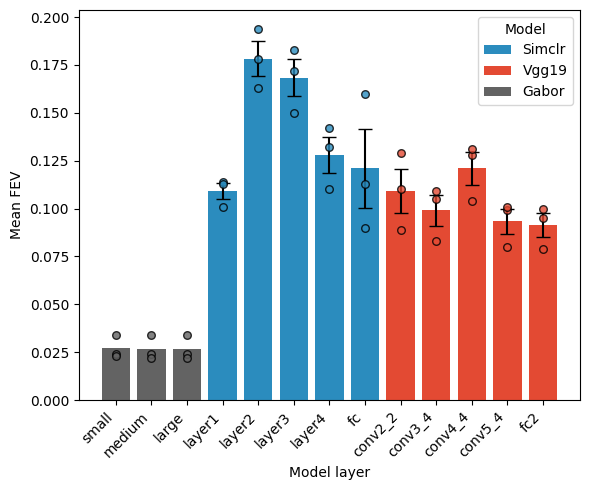

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

# Clean labels and sort
ordered_labels = [
    'small', 'medium', 'large',
    'layer1', 'layer2', 'layer3', 'layer4', 'fc',
    'conv2_2', 'conv3_4', 'conv4_4', 'conv5_4', 'fc2'
]
for df in [avg_metrics, df_pcs]:
    df["layer"] = df["layer"].str.replace(r"^gabor_", "", regex=True)
    df["layer"] = pd.Categorical(df["layer"], categories=ordered_labels, ordered=True)

avg_metrics = avg_metrics.sort_values('layer')

# Colour mapping by model
model_colour = {
    'simclr': simclr_colours['layer4'],
    'vgg19': vgg19_colours['conv5_4'],
    'gabor': gabor_filter_colours['gabor_large']
}

avg_metrics["colour"] = avg_metrics["model_target"].str.lower().map(
    lambda s: next((v for k, v in model_colour.items() if k in s), None)
)

# Plot
plt.figure(figsize=(6, 5))

# Error bars
plt.bar(
    avg_metrics['layer'],
    avg_metrics['mean_fev'],
    yerr=avg_metrics['sem_fev'],
    capsize=5,
    color=avg_metrics['colour']
)

# Overlay individual points
for _, row in df_pcs.iterrows():
    plt.scatter(
        row["layer"], row["mean_fev"],
        color=model_colour[row["model_target"].split("_")[0]],
        edgecolor='black', s=30, alpha=0.8, zorder=3
    )

# Axis and legend
plt.ylabel('Mean FEV')
plt.xlabel('Model layer')
plt.xticks(rotation=45, ha='right')
plt.legend(
    handles=[Patch(facecolor=color, label=model.capitalize()) for model, color in model_colour.items()],
    title="Model"
)
plt.tight_layout()
plt.show()